In [1]:
import os
import time
import uuid
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.models import Model, Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_images_and_labels(folder_path):
    image_data = []
    labels = []
    csv_file = os.path.join(folder_path, 'labels.csv')
    if not os.path.isfile(csv_file):
        raise FileNotFoundError(f"CSV file 'labels.csv' not found in {folder_path}")
    labels_df = pd.read_csv(csv_file)
    print("CSV Columns:", labels_df.columns.tolist())
    labels_df.columns = labels_df.columns.str.strip()
    expected_columns = ['filename', 'Aniket', 'Gaurav', 'Himanshu', 'Rohan', 'Subh']
    missing_columns = [col for col in expected_columns if col not in labels_df.columns]
    if missing_columns:
        raise ValueError(f"CSV file is missing columns: {', '.join(missing_columns)}")
    for index, row in labels_df.iterrows():
        image_path = os.path.join(folder_path, row['filename'])
        if not os.path.isfile(image_path):
            raise FileNotFoundError(f"Image file {row['filename']} not found in {folder_path}")
        with Image.open(image_path) as img:
            img = img.convert('RGB')
            img_array = np.array(img)
            image_data.append(img_array)
        label = row[['Aniket', 'Gaurav', 'Himanshu', 'Rohan', 'Subh']].values
        labels.append(label)
    df = pd.DataFrame({
        'image': image_data,
        'label': labels
    })

    return df

In [4]:
folder = '/content/drive/MyDrive/tvt/test'

In [5]:
df1 = load_images_and_labels(folder)

CSV Columns: ['filename', ' Aniket', ' Gaurav', ' Himanshu', ' Rohan', ' Subh']


In [6]:
df1

,image,label
0,"[[[234, 235, 229], [234, 235, 229], [232, 233,...","[1, 0, 0, 0, 0]"
1,"[[[101, 99, 78], [95, 93, 72], [91, 88, 69], [...","[0, 0, 0, 0, 1]"
2,"[[[184, 185, 115], [184, 185, 115], [182, 183,...","[0, 0, 1, 0, 0]"
3,"[[[143, 136, 128], [143, 136, 128], [143, 136,...","[0, 0, 1, 0, 0]"
4,"[[[182, 177, 171], [180, 175, 169], [178, 173,...","[0, 0, 0, 0, 1]"


In [7]:
folder2 = '/content/drive/MyDrive/tvt/train'
df2 = load_images_and_labels(folder2)

CSV Columns: ['filename', ' Aniket', ' Gaurav', ' Himanshu', ' Rohan', ' Subh']


In [8]:
df2.head()

,image,label
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[0, 0, 1, 0, 0]"
1,"[[[108, 112, 111], [108, 112, 111], [102, 106,...","[0, 0, 1, 0, 0]"
2,"[[[125, 109, 93], [125, 109, 93], [125, 109, 9...","[0, 1, 0, 0, 0]"
3,"[[[0, 0, 0], [5, 5, 5], [8, 8, 8], [6, 6, 6], ...","[1, 0, 0, 0, 0]"
4,"[[[4, 0, 0], [31, 26, 22], [29, 24, 20], [30, ...","[0, 0, 0, 1, 0]"


In [9]:
folder3 = '/content/drive/MyDrive/tvt/valid'

In [10]:
df3 = load_images_and_labels(folder3)

CSV Columns: ['filename', ' Aniket', ' Gaurav', ' Himanshu', ' Rohan', ' Subh']


In [11]:
df = pd.concat([df1, df2, df3], ignore_index=True)

In [12]:
df.head()

,image,label
0,"[[[234, 235, 229], [234, 235, 229], [232, 233,...","[1, 0, 0, 0, 0]"
1,"[[[101, 99, 78], [95, 93, 72], [91, 88, 69], [...","[0, 0, 0, 0, 1]"
2,"[[[184, 185, 115], [184, 185, 115], [182, 183,...","[0, 0, 1, 0, 0]"
3,"[[[143, 136, 128], [143, 136, 128], [143, 136,...","[0, 0, 1, 0, 0]"
4,"[[[182, 177, 171], [180, 175, 169], [178, 173,...","[0, 0, 0, 0, 1]"


In [13]:
df.to_csv('my_dataframe.csv')

In [14]:
df.to_pickle('dataframe.pkl')

In [15]:
X = np.array(df['image'].tolist())
y = np.array(df['label'].tolist())

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train = X_train / 255.0
X_val = X_val / 255.0

In [18]:
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

In [19]:
def small_cnn(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), num_classes=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    # model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model
model = small_cnn(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), num_classes=y_train.shape[1])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 235ms/step - accuracy: 0.3616 - loss: 21.0263 - val_accuracy: 0.2353 - val_loss: 1.4714
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.3889 - loss: 1.2368 - val_accuracy: 0.5588 - val_loss: 1.4613
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.7281 - loss: 0.7964 - val_accuracy: 0.5588 - val_loss: 0.9718
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8124 - loss: 0.5980 - val_accuracy: 0.6471 - val_loss: 1.4655
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8945 - loss: 0.3477 - val_accuracy: 0.6471 - val_loss: 1.3616


In [20]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6397 - loss: 1.3869
Validation Loss: 1.3616
Validation Accuracy: 0.6471


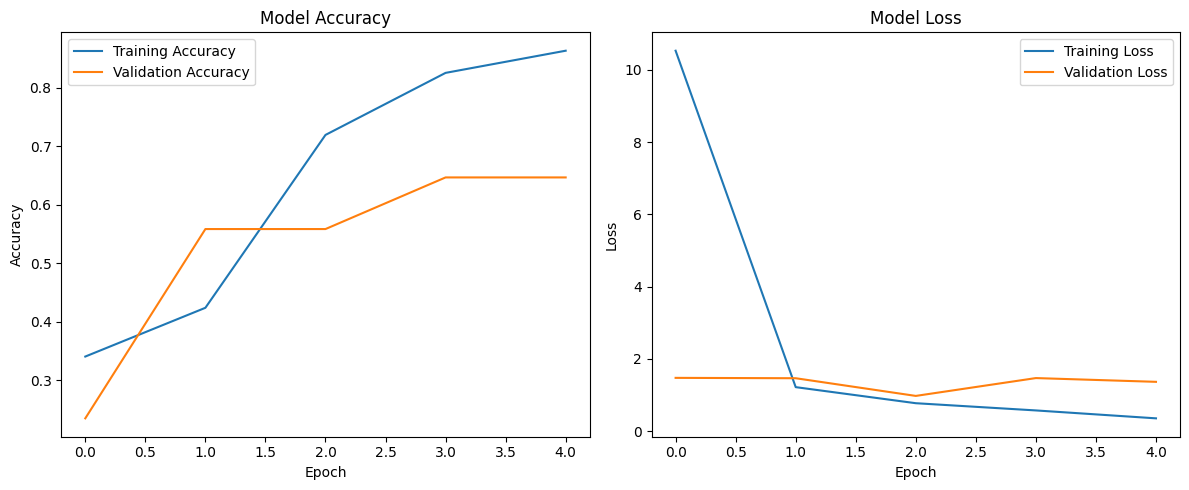

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [22]:
model.save('friends_face_model_cnn.keras')